# getting to know your data

###  Use the u.user file and assign it to a dataframe 

In [15]:
import numpy as np
import pandas as pd

    


In [16]:
#https://www.codegrepper.com/code-examples/python/pandas+split+column+by+delimiter+into+multiple+columns
df_user=pd.read_excel("u.user.xlsx") 
print(df_user.columns)              
df_user=df_user['user_id|age|gender|occupation|zip_code'].str.split('|', expand=True)

df_user.columns=["user_id","age","gender","occupation","zip_code"]
df_user


Index(['user_id|age|gender|occupation|zip_code'], dtype='object')


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


###  See the first 5 entries

In [17]:
df_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


 ###  What is the number of observations in the dataset?

In [18]:
df_user.shape[0]

943

 ### What is the number of columns in the dataset?

In [19]:
df_user.shape[1]

5

### Print the name of all the columns.

In [20]:
df_user.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

### How is the dataset indexed?

In [21]:
df_user.index

RangeIndex(start=0, stop=943, step=1)

### What is datatype of each cloumn?

In [22]:
df_user.dtypes

user_id       object
age           object
gender        object
occupation    object
zip_code      object
dtype: object

###  How many different occupation are in this dataset?

In [23]:

df_user["occupation"].value_counts().count()


21

In [24]:
df_user["occupation"].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

### What is the most frequent occupation?

In [25]:
df_user["occupation"].value_counts().sort_values(ascending=False).index[0]

'student'

### Summarize the DataFrame.

In [26]:
df_user.describe()


,user_id,age,gender,occupation,zip_code
count,943,943,943,943,943
unique,943,61,2,21,795
top,1,30,M,student,55414
freq,1,39,670,196,9


### Summarize all the columns

In [27]:
df_user.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943,943,943,943,943
unique,943,61,2,21,795
top,1,30,M,student,55414
freq,1,39,670,196,9


### Summarize only the occupation column

In [28]:
df_user.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### What is the age with least occurrence?

In [29]:
df_user.age.value_counts().tail()


7     1
66    1
11    1
10    1
73    1
Name: age, dtype: int64

# Load Json file

## read a raw_nyc_phil.json data

In [30]:
#https://github.com/nyphilarchive/PerformanceHistory/
import pandas as pd
import numpy as np

df=pd.read_json("raw_nyc_phil.json")
df

,programs
0,"{'season': '1842-43', 'orchestra': 'New York P..."
1,"{'season': '1842-43', 'orchestra': 'New York P..."
2,"{'season': '1842-43', 'orchestra': 'Musicians ..."
3,"{'season': '1842-43', 'orchestra': 'New York P..."
4,"{'season': '1843-44', 'orchestra': 'New York P..."
...,...
13949,"{'season': '2016-17', 'orchestra': 'Musicians ..."
13950,"{'season': '2016-17', 'orchestra': 'New York P..."
13951,"{'season': '2016-17', 'orchestra': 'New York P..."
13952,"{'season': '2016-17', 'orchestra': 'New York P..."


In [31]:
columns=df.iloc[0][0].keys()
columns



dict_keys(['season', 'orchestra', 'concerts', 'programID', 'works', 'id'])

### Normalize a json data so that you get an output with columns¶
Date eventType Venue Location Time id orchestra programID season

In [32]:
#https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd
##https://pythonmana.com/2021/08/20210809143233849o.html
import json
from pandas.io.json import json_normalize

In [33]:
df1 = pd.json_normalize(df['programs'])
df1

,season,orchestra,concerts,programID,works,id
0,1842-43,New York Philharmonic,"[{'Date': '1842-12-07T05:00:00Z', 'eventType':...",3853,"[{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....",38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,"[{'Date': '1843-02-18T05:00:00Z', 'eventType':...",5178,[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,"[{'Date': '1843-04-07T05:00:00Z', 'eventType':...",10785,"[{'workTitle': 'EGMONT, OP.84', 'composerName'...",894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,"[{'Date': '1843-04-22T05:00:00Z', 'eventType':...",5887,"[{'workTitle': 'SYMPHONY NO. 2 IN D MAJOR, OP....",34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,"[{'Date': '1843-11-18T05:00:00Z', 'eventType':...",305,"[{'workTitle': 'SYMPHONY NO. 7 IN A MAJOR, OP....",610a4acc-94e4-4cd6-bdc1-8ad020edc7e9
...,...,...,...,...,...,...
13949,2016-17,Musicians from the New York Philharmonic,"[{'Date': '2017-06-24T04:00:00Z', 'eventType':...",14189,"[{'workTitle': 'QUARTET, STRING, NO. 3 (MISHIM...",3d50968c-2e8b-405f-969c-ba36f941f393
13950,2016-17,New York Philharmonic,"[{'Date': '2017-07-02T04:00:00Z', 'eventType':...",14146,"[{'workTitle': 'SYMPHONY NO. 9, E MINOR, OP.95...",adb9fc8b-95bc-47d0-9f4b-78fc242f1f8f
13951,2016-17,New York Philharmonic,"[{'Date': '2017-07-03T04:00:00Z', 'eventType':...",14148,[{'workTitle': 'SYMPHONY NO. 7 IN E MINOR (SO...,f072c652-c452-4ad4-975a-f6abd5ff8b4d
13952,2016-17,New York Philharmonic,"[{'Date': '2017-07-04T04:00:00Z', 'eventType':...",14136,"[{'workTitle': 'SYMPHONY NO. 9, E MINOR, OP.95...",68625626-8085-44e4-bdb3-d8e6ac51c95b


In [34]:
df2 = pd.json_normalize(data=df['programs'], record_path='concerts', meta=['id', 'orchestra','programID', 'season'])
df2

,Date,eventType,Venue,Location,Time,id,orchestra,programID,season
0,1842-12-07T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43
1,1843-02-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,c7b2b95c-5e0b-431c-a340-5b37fc860b34,New York Philharmonic,5178,1842-43
2,1843-04-07T05:00:00Z,Special,Apollo Rooms,"Manhattan, NY",8:00PM,894e1a52-1ae5-4fa7-aec0-b99997555a37,Musicians from the New York Philharmonic,10785,1842-43
3,1843-04-22T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,34ec2c2b-3297-4716-9831-b538310462b7,New York Philharmonic,5887,1842-43
4,1843-11-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",None,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,New York Philharmonic,305,1843-44
...,...,...,...,...,...,...,...,...,...
21602,2017-06-24T04:00:00Z,Chamber,Guild Hall,"East Hampton, NY",None,3d50968c-2e8b-405f-969c-ba36f941f393,Musicians from the New York Philharmonic,14189,2016-17
21603,2017-07-02T04:00:00Z,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,adb9fc8b-95bc-47d0-9f4b-78fc242f1f8f,New York Philharmonic,14146,2016-17
21604,2017-07-03T04:00:00Z,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,f072c652-c452-4ad4-975a-f6abd5ff8b4d,New York Philharmonic,14148,2016-17
21605,2017-07-04T04:00:00Z,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,"Shanghai, CHINA",7:30PM,68625626-8085-44e4-bdb3-d8e6ac51c95b,New York Philharmonic,14136,2016-17


## Normalize a json data to get an output with columns :

soloistName 	soloistRoles 	soloistInstrument 	id

In [35]:
df3 = pd.json_normalize(data=df["programs"], record_path=["works", "soloists"],meta=["id"])
df3

,soloistName,soloistRoles,soloistInstrument,id
0,"Otto, Antoinette",S,Soprano,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,"Scharfenberg, William",A,Piano,38e072a7-8fc9-4f9a-8eac-3957905c0002
2,"Hill, Ureli Corelli",A,Violin,38e072a7-8fc9-4f9a-8eac-3957905c0002
3,"Derwort, G. H.",A,Viola,38e072a7-8fc9-4f9a-8eac-3957905c0002
4,"Boucher, Alfred",A,Cello,38e072a7-8fc9-4f9a-8eac-3957905c0002
...,...,...,...,...
56189,"Xu, Weiqin",S,Baritone,68625626-8085-44e4-bdb3-d8e6ac51c95b
56190,"Martin, Christopher",S,Trumpet,5c22d35f-a282-4505-bd31-df619c74f52b
56191,"Shryock, Grace",S,English Horn,5c22d35f-a282-4505-bd31-df619c74f52b
56192,Jazz at Lincoln Center Orchestra with Wynton M...,S,Jazz Ensemble,5c22d35f-a282-4505-bd31-df619c74f52b


## Normalize a json to get an output with columns
soloistName 	soloistRoles 	soloistInstrument 	id 	orchestra 	programID 	season 	 	Date 	eventType 	Venue 	Location 	Time

In [36]:
#https://www.pauldesalvo.com/how-to-remove-or-prevent-duplicate-columns-from-a-pandas-merge/
##How to Remove or Prevent Duplicate Columns From a Pandas Merge
###https://pythonmana.com/2021/08/20210809143233849o.html
df4=df2.merge(df3, how='left', left_index=True, right_index=True,suffixes=('', '_drop')).T.drop_duplicates().T
df4=df4.drop([col for col in df4.columns if 'drop' in col], axis=1)
df4


,Date,eventType,Venue,Location,Time,id,orchestra,programID,season,soloistName,soloistRoles,soloistInstrument
0,1842-12-07T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43,"Otto, Antoinette",S,Soprano
1,1843-02-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,c7b2b95c-5e0b-431c-a340-5b37fc860b34,New York Philharmonic,5178,1842-43,"Scharfenberg, William",A,Piano
2,1843-04-07T05:00:00Z,Special,Apollo Rooms,"Manhattan, NY",8:00PM,894e1a52-1ae5-4fa7-aec0-b99997555a37,Musicians from the New York Philharmonic,10785,1842-43,"Hill, Ureli Corelli",A,Violin
3,1843-04-22T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,34ec2c2b-3297-4716-9831-b538310462b7,New York Philharmonic,5887,1842-43,"Derwort, G. H.",A,Viola
4,1843-11-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",None,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,New York Philharmonic,305,1843-44,"Boucher, Alfred",A,Cello
...,...,...,...,...,...,...,...,...,...,...,...,...
21602,2017-06-24T04:00:00Z,Chamber,Guild Hall,"East Hampton, NY",None,3d50968c-2e8b-405f-969c-ba36f941f393,Musicians from the New York Philharmonic,14189,2016-17,"Thibault, Conrad",S,Baritone
21603,2017-07-02T04:00:00Z,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,adb9fc8b-95bc-47d0-9f4b-78fc242f1f8f,New York Philharmonic,14146,2016-17,"Rounseville, Robert",S,Tenor
21604,2017-07-03T04:00:00Z,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,f072c652-c452-4ad4-975a-f6abd5ff8b4d,New York Philharmonic,14148,2016-17,"Wright, Martha",S,Mezzo-Soprano
21605,2017-07-04T04:00:00Z,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,"Shanghai, CHINA",7:30PM,68625626-8085-44e4-bdb3-d8e6ac51c95b,New York Philharmonic,14136,2016-17,"Thibault, Conrad",S,Baritone


## Tidying up Fields in the Data


In [37]:
#To remove timezone 
#https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime
df4['Date'] = pd.to_datetime(df4.Date).dt.tz_localize(None)  
df4

,Date,eventType,Venue,Location,Time,id,orchestra,programID,season,soloistName,soloistRoles,soloistInstrument
0,1842-12-07 05:00:00,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,38e072a7-8fc9-4f9a-8eac-3957905c0002,New York Philharmonic,3853,1842-43,"Otto, Antoinette",S,Soprano
1,1843-02-18 05:00:00,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,c7b2b95c-5e0b-431c-a340-5b37fc860b34,New York Philharmonic,5178,1842-43,"Scharfenberg, William",A,Piano
2,1843-04-07 05:00:00,Special,Apollo Rooms,"Manhattan, NY",8:00PM,894e1a52-1ae5-4fa7-aec0-b99997555a37,Musicians from the New York Philharmonic,10785,1842-43,"Hill, Ureli Corelli",A,Violin
3,1843-04-22 05:00:00,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,34ec2c2b-3297-4716-9831-b538310462b7,New York Philharmonic,5887,1842-43,"Derwort, G. H.",A,Viola
4,1843-11-18 05:00:00,Subscription Season,Apollo Rooms,"Manhattan, NY",None,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,New York Philharmonic,305,1843-44,"Boucher, Alfred",A,Cello
...,...,...,...,...,...,...,...,...,...,...,...,...
21602,2017-06-24 04:00:00,Chamber,Guild Hall,"East Hampton, NY",None,3d50968c-2e8b-405f-969c-ba36f941f393,Musicians from the New York Philharmonic,14189,2016-17,"Thibault, Conrad",S,Baritone
21603,2017-07-02 04:00:00,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,adb9fc8b-95bc-47d0-9f4b-78fc242f1f8f,New York Philharmonic,14146,2016-17,"Rounseville, Robert",S,Tenor
21604,2017-07-03 04:00:00,Tour,Shanghai Symphony Hall,"Shanghai, CHINA",7:30PM,f072c652-c452-4ad4-975a-f6abd5ff8b4d,New York Philharmonic,14148,2016-17,"Wright, Martha",S,Mezzo-Soprano
21605,2017-07-04 04:00:00,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,"Shanghai, CHINA",7:30PM,68625626-8085-44e4-bdb3-d8e6ac51c95b,New York Philharmonic,14136,2016-17,"Thibault, Conrad",S,Baritone


# cleaning dataset

#### 1. Dropping Columns in a DataFrame

In [38]:
# https://realpython.com/python-data-cleaning-numpy-pandas/
to_drop =["programID","id","Location"]     
df4.drop(to_drop, inplace=True, axis=1) #This tells Pandas that we want the changes to be made directly in our object and that it should look for the values to be dropped in the columns of the object.
df4

,Date,eventType,Venue,Time,orchestra,season,soloistName,soloistRoles,soloistInstrument
0,1842-12-07 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Otto, Antoinette",S,Soprano
1,1843-02-18 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Scharfenberg, William",A,Piano
2,1843-04-07 05:00:00,Special,Apollo Rooms,8:00PM,Musicians from the New York Philharmonic,1842-43,"Hill, Ureli Corelli",A,Violin
3,1843-04-22 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Derwort, G. H.",A,Viola
4,1843-11-18 05:00:00,Subscription Season,Apollo Rooms,None,New York Philharmonic,1843-44,"Boucher, Alfred",A,Cello
...,...,...,...,...,...,...,...,...,...
21602,2017-06-24 04:00:00,Chamber,Guild Hall,None,Musicians from the New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone
21603,2017-07-02 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Rounseville, Robert",S,Tenor
21604,2017-07-03 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Wright, Martha",S,Mezzo-Soprano
21605,2017-07-04 04:00:00,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,7:30PM,New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone


### Delete rows containing either 50% or more than 50% NaN Values

In [39]:
#perc = 50.0 
#min_count =  int(((100-perc)/100)*df4.shape[1] + 1)
#df4 = df4.dropna( axis=0, thresh=min_count)
#df4

In [40]:
#df4.sort_values(by=['season'],ascending=False)   #

In [41]:
df4.dtypes

Date                 datetime64[ns]
eventType                    object
Venue                        object
Time                         object
orchestra                    object
season                       object
soloistName                  object
soloistRoles                 object
soloistInstrument            object
dtype: object

### Completely remove the dates we are not certain about and replace them with NumPy’s NaN

In [42]:
d=[df4["Time"][i]          for i in range(len(df4["Time"]))]

for j in range(len(df4["Time"])):
    if len(d[j])<5:
        d[j]="NaN"
           
df4['Time'] = d  
df4
        

        
    

,Date,eventType,Venue,Time,orchestra,season,soloistName,soloistRoles,soloistInstrument
0,1842-12-07 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Otto, Antoinette",S,Soprano
1,1843-02-18 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Scharfenberg, William",A,Piano
2,1843-04-07 05:00:00,Special,Apollo Rooms,8:00PM,Musicians from the New York Philharmonic,1842-43,"Hill, Ureli Corelli",A,Violin
3,1843-04-22 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Derwort, G. H.",A,Viola
4,1843-11-18 05:00:00,Subscription Season,Apollo Rooms,NaN,New York Philharmonic,1843-44,"Boucher, Alfred",A,Cello
...,...,...,...,...,...,...,...,...,...
21602,2017-06-24 04:00:00,Chamber,Guild Hall,NaN,Musicians from the New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone
21603,2017-07-02 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Rounseville, Robert",S,Tenor
21604,2017-07-03 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Wright, Martha",S,Mezzo-Soprano
21605,2017-07-04 04:00:00,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,7:30PM,New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone


In [43]:
import re
pattern = re.compile(r'\d+-\d+-\d+\s\d+:\d+:\d+')
d=[str(df4["Date"][i])        for i in range(len(df4["Date"]))]
l=[]
for j in range(len(df4["Date"])):
    if not re.findall(pattern, d[j]):
        l.append(d[j])
print(l)

[]


In [44]:
d=[str(df4["Date"][i])        for i in range(len(df4["Date"]))]
l=[]
for j in range(len(df4["Date"])):
    if df4['Date'][j] == '':
        l.append(d[j])
        #d[j]="NaN"
#df4["Date"]=d
print(l)

[]


In [45]:
d=[str(df4["eventType"][i])        for i in range(len(df4["eventType"]))]
for j in range(len(df4["eventType"])):
    if re.findall("None", d[j]):
        d[j]="NaN"


df4["eventType"]=d



In [46]:
d=[df4["Venue"][i]          for i in range(len(df4["Venue"]))]

for j in range(len(df4["Venue"])):
    if re.findall(("None"), d[j]):
        d[j]="NaN"
        
        
    if re.findall(("Unknown Venue"), d[j]):
        d[j]="NaN"
df4["Venue"]=d



In [47]:
d=[df4["orchestra"][i]       for i in range(len(df4["orchestra"]))]
for j in range(len(df4["orchestra"])):
    if re.findall(("orchestra"), d[j]):
        d[j]="NaN"
        
df4["orchestra"]=d

In [48]:
d=[df4["soloistRoles"][i]          for i in range(len(df4["soloistRoles"]))]

for j in range(len(df4["soloistName"])):
    if not re.findall(("S"), d[j]):
        if not re.findall(("A"), d[j]):
            d[j]="NaN"
df4["soloistRoles"]=d

In [49]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
df4['soloistRoles'].value_counts(dropna=False) #With dropna set to False we can also see NaN index values.

S      16186
A       5311
NaN      110
Name: soloistRoles, dtype: int64

In [50]:
pattern="Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer"
d=[df4["soloistInstrument"][i]       for i in range(len(df4["soloistInstrument"]))]
for j in range(len(df4["soloistInstrument"])):
    if re.findall(pattern, d[j]):
        d[j]="Dancer"


df4["soloistInstrument"]=d

In [55]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
##https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5
d=df4.groupby("soloistInstrument").groups
print(d)

{'': [27, 34, 37, 40, 1870, 4011, 5751, 6330, 6771, 6891, 13232, 16031, 16307, 16310, 16314, 16319, 16323, 16327, 17138, 17140, 17142, 17144, 17147, 17149, 17797, 18236, 18423, 18428, 18433, 18438, 18443, 18448, 18453, 18458, 19527, 19655, 19660, 19667, 20177, 20179, 20182, 20184, 20188, 20197, 20199, 20201, 20205, 20209, 20211, 20562, 20592, 21438], ' ': [1653, 1661, 4012, 4013, 7756, 8592, 8618, 16308, 16311, 16315, 16320, 16324, 16328, 21569, 21574, 21578], 'Accordion': [10862, 17080, 17082, 17086, 17088, 17090], 'Actor': [5959, 5960, 6012, 6013], 'Actor and Dancer': [13419, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427], 'Advanced Chorus': [1984, 1989, 1997], 'Alto': [134, 422, 805, 812, 822, 948, 1859, 2144, 2146, 2148, 2150, 2187, 2188, 2189, 2191, 2193, 2195, 2197, 2199, 2450, 2452, 2460, 2463, 2465, 2467, 2469, 2471, 2485, 2489, 3005, 3074, 3075, 3076, 3088, 3089, 3090, 3243, 3244, 3245, 3246, 3326, 3339, 3372, 3683, 3740, 3741, 4082, 4876, 5417, 7553, 9262, 12545, 126

In [60]:
d=[df4["soloistInstrument"][i]       for i in range(len(df4["soloistInstrument"]))]

for j in range(len(df4["soloistInstrument"])):
    if df4['soloistInstrument'][j] == '':
        d[j]="NaN"
    if df4['soloistInstrument'][j] == ' ':
        d[j]="NaN"
df4["soloistInstrument"]=d


In [61]:
d=df4.groupby("soloistInstrument").groups
print(d)

{'Accordion': [10862, 17080, 17082, 17086, 17088, 17090], 'Actor': [5959, 5960, 6012, 6013], 'Actor and Dancer': [13419, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427], 'Advanced Chorus': [1984, 1989, 1997], 'Alto': [134, 422, 805, 812, 822, 948, 1859, 2144, 2146, 2148, 2150, 2187, 2188, 2189, 2191, 2193, 2195, 2197, 2199, 2450, 2452, 2460, 2463, 2465, 2467, 2469, 2471, 2485, 2489, 3005, 3074, 3075, 3076, 3088, 3089, 3090, 3243, 3244, 3245, 3246, 3326, 3339, 3372, 3683, 3740, 3741, 4082, 4876, 5417, 7553, 9262, 12545, 12603, 13153, 13181, 13496, 13843, 16541, 16542, 18639, 18642, 18645, 18668, 18669, 18670, 18672, 18674, 18676, 18697, 18760, 18774, 19027, 19178, 19182, 19195, 19272, 19276, 19284, 19289, 19294, 19297, 19311, 19496, 19508, 19806, 19811, 19816, 19821, 19826, 19831, 19836, 19841, 19846, 19851, 19856, 19861, 19866, 19871, 19876, 19888, ...], 'Bagpipes': [14403], 'Balladeer': [21216, 21219], 'Baritone': [215, 260, 262, 278, 283, 293, 297, 319, 322, 326, 327, 355, 36

In [62]:
d=df4.groupby("soloistName").groups
print(d)

{'': [27, 34, 37, 40, 1870, 5751, 6771, 6891, 13232, 16031, 16307, 16310, 16314, 16319, 16323, 16327, 17138, 17140, 17142, 17144, 17147, 17149, 17797, 18236, 19655, 19660, 19667, 20177, 20179, 20182, 20184, 20188, 20197, 20199, 20201, 20205, 20209, 20211], ' ': [8592, 8618, 16308, 16311, 16315, 16320, 16324, 16328], 'Abato, Vincent J.': [16126, 16133], 'Abel, Carmen': [16386], 'Abella': [356], 'Ablamowicz': [138, 139], 'Abott, Bessie': [2756, 2759, 2760, 2761, 2762, 2764, 2765, 2766], 'Abram, Jacques': [15428, 17944, 18664, 18665, 18666, 20364, 20458], 'Achron, Isidor': [13282], 'Ackerman, Jean': [10512, 10708, 10750], 'Acuna, Maria Teresa': [17031, 17033, 17036], 'Adair, Alan': [9004, 9128], 'Adams, Jas Jule': [13419], 'Addimando, Caesare': [2921, 2924, 4099, 4102], 'Addison, Adele': [21229, 21234], 'Adelman, Sarah': [9591, 9753], 'Adler, Clarence': [4222, 7101, 7112, 7116], 'Adler, Emily': [10581], 'Adler, Josef': [5307, 5372], 'Adler, Larry': [14978, 14979, 14980, 14981, 14983, 1498

In [63]:
d=[df4["soloistName"][i]       for i in range(len(df4["soloistName"]))]

for j in range(len(df4["soloistName"])):
    if df4['soloistName'][j] == '':
        d[j]="NaN"
    if df4['soloistName'][j] == ' ':
        d[j]="NaN"
df4["soloistName"]=d

In [64]:
d=df4.groupby("soloistName").groups
print(d)

{'Abato, Vincent J.': [16126, 16133], 'Abel, Carmen': [16386], 'Abella': [356], 'Ablamowicz': [138, 139], 'Abott, Bessie': [2756, 2759, 2760, 2761, 2762, 2764, 2765, 2766], 'Abram, Jacques': [15428, 17944, 18664, 18665, 18666, 20364, 20458], 'Achron, Isidor': [13282], 'Ackerman, Jean': [10512, 10708, 10750], 'Acuna, Maria Teresa': [17031, 17033, 17036], 'Adair, Alan': [9004, 9128], 'Adams, Jas Jule': [13419], 'Addimando, Caesare': [2921, 2924, 4099, 4102], 'Addison, Adele': [21229, 21234], 'Adelman, Sarah': [9591, 9753], 'Adler, Clarence': [4222, 7101, 7112, 7116], 'Adler, Emily': [10581], 'Adler, Josef': [5307, 5372], 'Adler, Larry': [14978, 14979, 14980, 14981, 14983, 14984, 14986, 14987, 17323, 17324, 17325, 17326], 'Adolph Bolm Ballet Intime': [6229, 6258], 'Aguilar Lute Quartet': [10426], 'Aguilar, Elisa': [10428], 'Aguilar, Ezequiel': [10427], 'Aguilar, Paco': [10430], 'Aguilar, Pepe': [10429], 'Aiken, David': [21058, 21063, 21071, 21081, 21085, 21093], 'Aikens, Vanoye': [16964, 

In [65]:
d=df4.groupby("soloistInstrument").groups
print(d)

{'Accordion': [10862, 17080, 17082, 17086, 17088, 17090], 'Actor': [5959, 5960, 6012, 6013], 'Actor and Dancer': [13419, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427], 'Advanced Chorus': [1984, 1989, 1997], 'Alto': [134, 422, 805, 812, 822, 948, 1859, 2144, 2146, 2148, 2150, 2187, 2188, 2189, 2191, 2193, 2195, 2197, 2199, 2450, 2452, 2460, 2463, 2465, 2467, 2469, 2471, 2485, 2489, 3005, 3074, 3075, 3076, 3088, 3089, 3090, 3243, 3244, 3245, 3246, 3326, 3339, 3372, 3683, 3740, 3741, 4082, 4876, 5417, 7553, 9262, 12545, 12603, 13153, 13181, 13496, 13843, 16541, 16542, 18639, 18642, 18645, 18668, 18669, 18670, 18672, 18674, 18676, 18697, 18760, 18774, 19027, 19178, 19182, 19195, 19272, 19276, 19284, 19289, 19294, 19297, 19311, 19496, 19508, 19806, 19811, 19816, 19821, 19826, 19831, 19836, 19841, 19846, 19851, 19856, 19861, 19866, 19871, 19876, 19888, ...], 'Bagpipes': [14403], 'Balladeer': [21216, 21219], 'Baritone': [215, 260, 262, 278, 283, 293, 297, 319, 322, 326, 327, 355, 36

### Drop the duplicate rows

In [236]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
duplicate = df4[df4.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,Date,eventType,Venue,Time,orchestra,season,soloistName,soloistRoles,soloistInstrument
784,1901-06-30 05:00:00,Tour,Willow Grove Park,8:00PM,New York Symphony,1900-01,"Essipoff, Annette",S,Piano
791,1901-07-03 05:00:00,Tour,Willow Grove Park,8:00PM,New York Symphony,1900-01,"Essipoff, Annette",S,Piano
1975,1916-05-16 05:00:00,Tour,Lyceum Theatre,NaN,New York Philharmonic,1915-16,"Davies, Benjamin Grey",S,Tenor
2514,1920-02-21 05:00:00,Young People's Concert,NaN,2:30PM,New York Symphony,1919-20,"Nordica, Lillian",S,Soprano
2824,1921-05-02 04:00:00,Tour,Salt Lake Tabernacle,NaN,New York Philharmonic,1920-21,"Saint-Saens, Camille",S,Piano
3677,1925-08-24 04:00:00,Stadium Concert,Lewisohn Stadium,8:30PM,Stadium-NY Philharmonic,1924-25,Oratorio Society of Toronto,S,Chorus
4328,1928-04-01 05:00:00,Subscription Season,Mecca Auditorium,3:00PM,New York Symphony,1927-28,"Connell, Horatio",S,Vocalist
4449,1928-12-16 05:00:00,Subscription Season,Metropolitan Opera House (39th street),3:00PM,New York Philharmonic,1928-29,"Schulz, Leo",S,Cello
4547,1929-07-16 04:00:00,Stadium Concert,Lewisohn Stadium,8:30PM,Stadium-NY Philharmonic,1928-29,"Barrere [Barrère], Georges",S,Flute
8359,1950-09-03 04:00:00,Special,Roxy Theatre,NaN,New York Philharmonic,1950-51,"Rethberg, Elisabeth",S,Soprano


In [240]:
df4.drop_duplicates()

,Date,eventType,Venue,Time,orchestra,season,soloistName,soloistRoles,soloistInstrument
0,1842-12-07 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Otto, Antoinette",S,Soprano
1,1843-02-18 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Scharfenberg, William",A,Piano
2,1843-04-07 05:00:00,Special,Apollo Rooms,8:00PM,Musicians from the New York Philharmonic,1842-43,"Hill, Ureli Corelli",A,Violin
3,1843-04-22 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Derwort, G. H.",A,Viola
4,1843-11-18 05:00:00,Subscription Season,Apollo Rooms,NaN,New York Philharmonic,1843-44,"Boucher, Alfred",A,Cello
...,...,...,...,...,...,...,...,...,...
21602,2017-06-24 04:00:00,Chamber,Guild Hall,NaN,Musicians from the New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone
21603,2017-07-02 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Rounseville, Robert",S,Tenor
21604,2017-07-03 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Wright, Martha",S,Mezzo-Soprano
21605,2017-07-04 04:00:00,Tour - Young People's Concert,Shanghai Symphony Hall--Chamber Hall,7:30PM,New York Philharmonic,2016-17,"Thibault, Conrad",S,Baritone


In [243]:
df4.sort_values(by=['season'], ascending=False)

,Date,eventType,Venue,Time,orchestra,season,soloistName,soloistRoles,soloistInstrument
21606,2017-07-07 04:00:00,Tour,Shanghai Symphony Hall,7:30PM,New York Philharmonic,2016-17,"Sarnoff, Dorothy",S,Soprano
21469,2016-12-15 05:00:00,Subscription Season,David Geffen Hall,7:30PM,New York Philharmonic,2016-17,"Gordon, Marjorie",S,Soprano
21479,2017-01-03 05:00:00,Subscription Season,David Geffen Hall,7:30PM,New York Philharmonic,2016-17,"Gordon, Marjorie",S,Soprano
21478,2016-12-30 05:00:00,Subscription Season,David Geffen Hall,8:00PM,New York Philharmonic,2016-17,"Lipton, Martha",S,Mezzo-Soprano
21477,2016-12-29 05:00:00,Subscription Season,David Geffen Hall,7:30PM,New York Philharmonic,2016-17,"Lewis, Brenda",S,Soprano
...,...,...,...,...,...,...,...,...,...
4,1843-11-18 05:00:00,Subscription Season,Apollo Rooms,NaN,New York Philharmonic,1843-44,"Boucher, Alfred",A,Cello
2,1843-04-07 05:00:00,Special,Apollo Rooms,8:00PM,Musicians from the New York Philharmonic,1842-43,"Hill, Ureli Corelli",A,Violin
1,1843-02-18 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Scharfenberg, William",A,Piano
3,1843-04-22 05:00:00,Subscription Season,Apollo Rooms,8:00PM,New York Philharmonic,1842-43,"Derwort, G. H.",A,Viola


<AxesSubplot:>

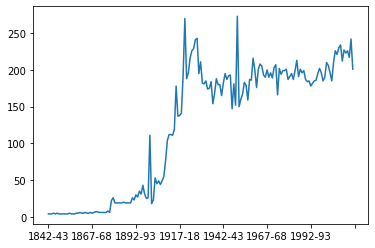

In [268]:
df4.season.value_counts().sort_index().plot() 

<AxesSubplot:>

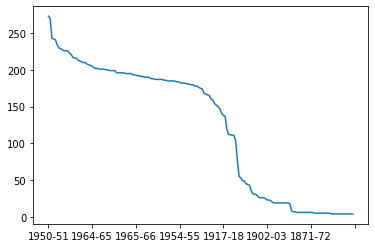

In [267]:
df4["season"].value_counts().sort_values(ascending=False).plot()